## Calculating RMSE of SSH between SW & NATL60
(Jupyter Notebook prepared by Yingjie Liu, 2018)

RMSE is computed every days over 30 days.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

# Read NATL60 ssh data

In [2]:
file='NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SSHdegrad.nc'
fid = nc.Dataset(file)
SSH_NAT=np.array(fid.variables["degraded_sossheig"][30:61,:,:]).squeeze()  # 471 comes from 366+15*7 and tmax=475
ssh_nat=np.zeros((SSH_NAT.shape[0],SSH_NAT.shape[1]*SSH_NAT.shape[2]))
lon1d=np.array(fid.variables["nav_lon"][:,:]).squeeze()
lat1d=np.array(fid.variables["nav_lat"][:,:]).squeeze()
for it in range(SSH_NAT.shape[0]):    #save data into ssh_nat
    xx=SSH_NAT[it,:,:]
    ssh_nat[it,:]=xx.reshape(xx.shape[0]*xx.shape[1]) #make the two dimension data into one dimension
print SSH_NAT.shape,SSH_NAT.shape[0]

(31, 301, 175) 31


# Read QG ssh data and calculate RMSE

In [3]:
ssh_new=np.zeros((31,SSH_NAT.shape[1]*SSH_NAT.shape[2])) #define new ssh in every loop 
ssh_err0=np.zeros((31))  #define error array, we have 8 group of QG data including 365 days running
for i in range(31):    
    file='testdata/ssh0'+'_'+str(i)+'.nc'   #read the new testing data from QG and repace it in ssh_new
    fids = nc.Dataset(file)
    SSH=np.array(fids.variables["SSH"][:,:]).squeeze() 
    ssh_new[i,:]=SSH.reshape(SSH.shape[0]*SSH.shape[1])   #make the two dimension data into one dimension
    ssh_sum=0
    for j in range(SSH_NAT.shape[1]):   #calculate RMSE
        ssh_sum=ssh_sum+(ssh_new[i,j]-ssh_nat[i,j])**2 #compare the data in the same starting point
        ssh_err0[i]=np.sqrt(ssh_sum/np.shape(ssh_new)[1])  #save 8 group of errors into ssh_err

In [4]:
ssh_new=np.zeros((31,SSH_NAT.shape[1]*SSH_NAT.shape[2])) #define new ssh in every loop 
ssh_err1=np.zeros((31))  #define error array, we have 8 group of QG data including 365 days running
for i in range(31):    
    file='testdata/ssh2'+'_'+str(i)+'.nc'   #read the new testing data from QG and repace it in ssh_new
    fids = nc.Dataset(file)
    SSH=np.array(fids.variables["SSH"][:,:]).squeeze() 
    ssh_new[i,:]=SSH.reshape(SSH.shape[0]*SSH.shape[1])   #make the two dimension data into one dimension
    ssh_sum=0
    for j in range(SSH_NAT.shape[1]):   #calculate RMSE
        ssh_sum=ssh_sum+(ssh_new[i,j]-ssh_nat[i,j])**2 #compare the data in the same starting point
        ssh_err1[i]=np.sqrt(ssh_sum/np.shape(ssh_new)[1])  #save 8 group of errors into ssh_err

In [5]:
ssh_new=np.zeros((31,SSH_NAT.shape[1]*SSH_NAT.shape[2])) #define new ssh in every loop 
ssh_err2=np.zeros((31))  #define error array, we have 8 group of QG data including 365 days running
for i in range(31):    
    file='testdata/ssh21'+'_'+str(i)+'.nc'   #read the new testing data from QG and repace it in ssh_new
    fids = nc.Dataset(file)
    SSH=np.array(fids.variables["SSH"][:,:]).squeeze() 
    ssh_new[i,:]=SSH.reshape(SSH.shape[0]*SSH.shape[1])   #make the two dimension data into one dimension
    ssh_sum=0
    for j in range(SSH_NAT.shape[1]):   #calculate RMSE
        ssh_sum=ssh_sum+(ssh_new[i,j]-ssh_nat[i,j])**2 #compare the data in the same starting point
        ssh_err2[i]=np.sqrt(ssh_sum/np.shape(ssh_new)[1])  #save 8 group of errors into ssh_err

In [6]:
ssh_new=np.zeros((31,SSH_NAT.shape[1]*SSH_NAT.shape[2])) #define new ssh in every loop 
ssh_err3=np.zeros((31))  #define error array, we have 8 group of QG data including 365 days running
for i in range(31):    
    file='testdata/ssh22'+'_'+str(i)+'.nc'   #read the new testing data from QG and repace it in ssh_new
    fids = nc.Dataset(file)
    SSH=np.array(fids.variables["SSH"][:,:]).squeeze() 
    ssh_new[i,:]=SSH.reshape(SSH.shape[0]*SSH.shape[1])   #make the two dimension data into one dimension
    ssh_sum=0
    for j in range(SSH_NAT.shape[1]):   #calculate RMSE
        ssh_sum=ssh_sum+(ssh_new[i,j]-ssh_nat[i,j])**2 #compare the data in the same starting point
        ssh_err3[i]=np.sqrt(ssh_sum/np.shape(ssh_new)[1])  #save 8 group of errors into ssh_err

# plot

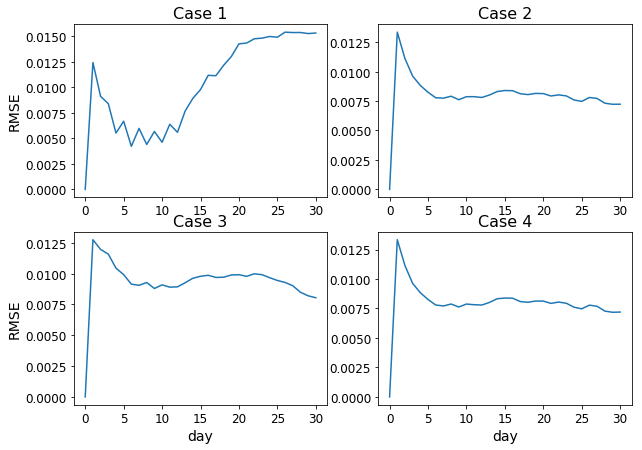

In [28]:
plt.figure()  
ax1=plt.subplot(221)
fig=plt.gcf()
fig.set_size_inches(10,7)
ax1.tick_params(axis='both',labelsize=12)
#ax1.xticks(fontsize=12)
ax1.plot(ssh_err0[:])
plt.ylabel('RMSE',fontsize=14)
plt.title('Case 1',fontsize=16);

ax2=plt.subplot(222)
ax2.plot(ssh_err1[:])
ax2.tick_params(axis='both',labelsize=12)
plt.title('Case 2',fontsize=16);

ax3=plt.subplot(223)
ax3.tick_params(axis='both',labelsize=12)
plt.ylabel('RMSE',fontsize=14)
plt.xlabel('day',fontsize=14)
ax4=plt.plot(ssh_err2[:])
plt.title('Case 3',fontsize=16);

ax4=plt.subplot(224)
ax4.tick_params(axis='both',labelsize=12)
ax4.plot(ssh_err3[:])
plt.xlabel('day',fontsize=14);
plt.title('Case 4',fontsize=16);
plt.savefig('fig5.jpg')
plt.show()


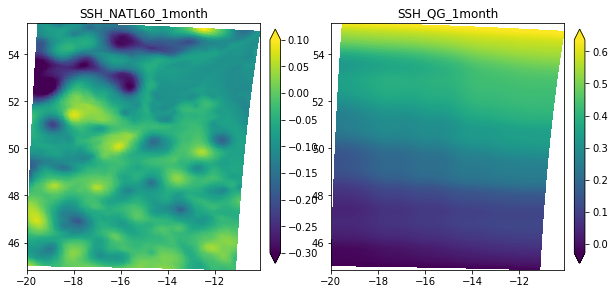

In [5]:
plt.figure(figsize=(10, 10))
vmin=-0.3
vmax=0.1

plt.subplot(221)
plt.pcolormesh(lon1d,lat1d,SSH_NAT[-1,:,:], vmin=vmin, vmax=vmax)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('SSH_NATL60_1month');

plt.subplot(222)
#plt.pcolormesh(lon,lat,Hf[-1,:,:], vmin=vmin, vmax=vmax)
plt.pcolormesh(lon1d,lat1d,SSH)
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('SSH_QG_1month');

plt.show()